In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Load Dataset

In [5]:
df = pd.read_csv("/content/drive/MyDrive/ML Lab final/data.txt", header = None)
df.head()

,0,1,2
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [6]:
X = df.iloc[:,0:-1].values
y = df.iloc[:,-1].values

X

array([[34.62365962, 78.02469282],
       [30.28671077, 43.89499752],
       [35.84740877, 72.90219803],
       [60.18259939, 86.3085521 ],
       [79.03273605, 75.34437644],
       [45.08327748, 56.31637178],
       [61.10666454, 96.51142588],
       [75.02474557, 46.55401354],
       [76.0987867 , 87.42056972],
       [84.43281996, 43.53339331],
       [95.86155507, 38.22527806],
       [75.01365839, 30.60326323],
       [82.30705337, 76.4819633 ],
       [69.36458876, 97.71869196],
       [39.53833914, 76.03681085],
       [53.97105215, 89.20735014],
       [69.07014406, 52.74046973],
       [67.94685548, 46.67857411],
       [70.66150955, 92.92713789],
       [76.97878373, 47.57596365],
       [67.37202755, 42.83843832],
       [89.67677575, 65.79936593],
       [50.53478829, 48.85581153],
       [34.21206098, 44.2095286 ],
       [77.92409145, 68.97235999],
       [62.27101367, 69.95445795],
       [80.19018075, 44.82162893],
       [93.1143888 , 38.80067034],
       [61.83020602,

In [7]:
y

array([0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1])

(100,)


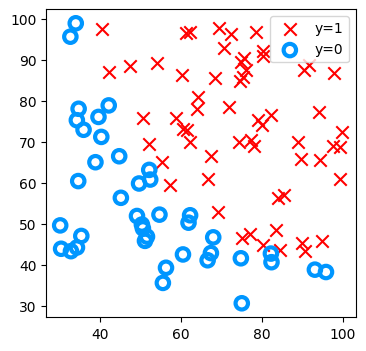

In [8]:
pos_label="y=1"
neg_label="y=0"
fig, ax = plt.subplots(1,1,figsize=(4,4))

pos = y == 1
neg = y == 0
print(pos.shape)

# Plot examples
ax.scatter(X[pos, 0], X[pos, 1], marker='x', s=80, c = 'red', label=pos_label)
ax.scatter(X[neg, 0], X[neg, 1], marker='o', s=80, label=neg_label, facecolors='none', edgecolors='#0096ff', lw=3)
ax.legend(loc='best' )

ax.figure.canvas.toolbar_visible = False
ax.figure.canvas.header_visible = False
ax.figure.canvas.footer_visible = False

In [9]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1,random_state=0)

In [10]:
class LogisticRegressionGD:
    def __init__(self, learningRate=0.0000001,num_it = 10000):
        self.learningRate = learningRate
        self.num_it = num_it
        self.features = None
        self.bias = None

    def sigmoid(self, z):
        warnings.filterwarnings('ignore')
        return 1/(1+np.exp(-z))

    def fitGD(self,X,y):
        num_samples,num_features = X.shape
        self.features = np.zeros(num_features)
        self.bias = 0

        for _ in range(self.num_it):
            linear_model = np.dot(X,self.features) + self.bias
            y_pred = self.sigmoid(linear_model)

            w = (1/num_samples)*np.dot(X.T,(y_pred-y))
            b = (1/num_samples)*np.sum(y_pred-y)
            self.features -= self.learningRate*w
            self.bias -= self.learningRate*b

    def predict(self,X):
        linear_model = np.dot(X,self.features) + self.bias
        y_pred = self.sigmoid(linear_model)
        y_pred_cls = [1 if i>0.5 else 0 for i in y_pred]
        return np.array(y_pred_cls)

    def accuracy(self, y_test,y_pred):
        accuracy = np.sum(y_test == y_pred)/len(y_test)
        return accuracy


In [11]:
model = LogisticRegressionGD(learningRate=0.0000001,num_it=10000)

In [12]:
model.fitGD(X_train,y_train)

In [13]:
y_pred = model.predict(X_test)

In [14]:
confusion_matrix(y_test,y_pred)

array([[0, 4],
       [0, 6]])

In [15]:
model.accuracy(y_test,y_pred)

0.6

In [16]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.60      1.00      0.75         6

    accuracy                           0.60        10
   macro avg       0.30      0.50      0.37        10
weighted avg       0.36      0.60      0.45        10



In [17]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1,random_state=0)
model = LogisticRegression(max_iter=10000)

In [18]:
model.fit(X_train,y_train)

LogisticRegression(max_iter=10000)

In [19]:
y_pred = model.predict(X_test)

In [20]:
confusion_matrix(y_test, y_pred)

array([[4, 0],
       [1, 5]])

In [21]:
accuracy_score(y_test,y_pred)

0.9

In [22]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89         4
           1       1.00      0.83      0.91         6

    accuracy                           0.90        10
   macro avg       0.90      0.92      0.90        10
weighted avg       0.92      0.90      0.90        10



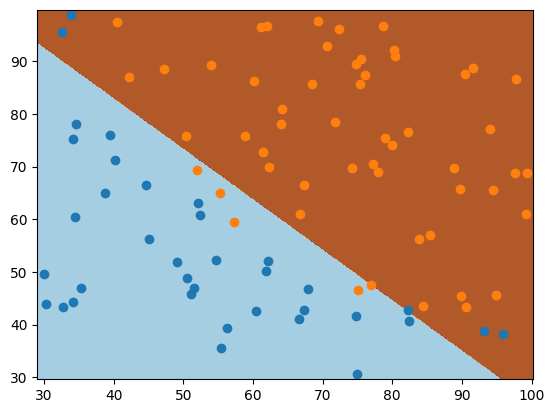

In [23]:
# define bounds of the domain
min1, max1 = X_train[:, 0].min()-1, X_train[:, 0].max()+1
min2, max2 = X_train[:, 1].min()-1, X_train[:, 1].max()+1

# define the x and y scale
x1grid = np.arange(min1, max1, 0.1)
x2grid = np.arange(min2, max2, 0.1)

# create all of the lines and rows of the grid
xx, yy = np.meshgrid(x1grid, x2grid)

# flatten each grid to a vector
r1, r2 = xx.flatten(), yy.flatten()
r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))

# horizontal stack vectors to create x1,x2 input for the model
grid = np.hstack((r1,r2))

# make predictions for the grid
yhat = model.predict(grid)

# reshape the predictions back into a grid
zz = yhat.reshape(xx.shape)

# plot the grid of x, y and z values as a surface
plt.contourf(xx, yy, zz, cmap='Paired')

for class_value in range(2):
    # get row indexes for samples with this class
    row_ix = np.where(y_train == class_value)
    # create scatter of these samples
    plt.scatter(X_train[row_ix, 0], X_train[row_ix, 1], cmap='Paired')